In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.formula.api as sm

In [3]:
#import original dataset
#df_accidents = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [3]:
#check the first few rows of the dataframe
df_accidents = pd.read_csv('/Users/Alexios/Documents/Project/US_Accidents_Dec20_updated.csv')
df_accidents.head()

In [4]:
# listing columns because the 'head' method didn't include all of them

col_list = []

for col in df_accidents:
    col_list.append(col)
    
print(col_list)

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [5]:
#reducing df to columns we find most relevant to our analysis

cleaned_df = df_accidents[['Severity','Start_Time', 'State','City', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Pressure(in)', 'Humidity(%)', 'Wind_Speed(mph)', 'Precipitation(in)']].copy()


In [6]:
#Adding text information of the numerical severity column

cleaned_df.loc[cleaned_df['Severity'] == 1, 'Severity_Text'] = 'Short Delay'
cleaned_df.loc[cleaned_df['Severity'] == 2, 'Severity_Text'] = 'Medium Delay'
cleaned_df.loc[cleaned_df['Severity'] == 3, 'Severity_Text'] = 'High Delay'
cleaned_df.loc[cleaned_df['Severity'] == 4, 'Severity_Text'] = 'Heavy Delay'

In [7]:
#ensuring data types are correct

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1516064 non-null  int64  
 1   Start_Time         1516064 non-null  object 
 2   State              1516064 non-null  object 
 3   City               1515981 non-null  object 
 4   Temperature(F)     1473031 non-null  float64
 5   Visibility(mi)     1471853 non-null  float64
 6   Weather_Condition  1472057 non-null  object 
 7   Pressure(in)       1479790 non-null  float64
 8   Humidity(%)        1470555 non-null  float64
 9   Wind_Speed(mph)    1387202 non-null  float64
 10  Precipitation(in)  1005515 non-null  float64
 11  Severity_Text      1516064 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 138.8+ MB


In [8]:
#checking for null values

cleaned_df.isna().sum()

Severity                  0
Start_Time                0
State                     0
City                     83
Temperature(F)        43033
Visibility(mi)        44211
Weather_Condition     44007
Pressure(in)          36274
Humidity(%)           45509
Wind_Speed(mph)      128862
Precipitation(in)    510549
Severity_Text             0
dtype: int64

In [9]:
#removing said null values and re-checking

cleaned_df = cleaned_df.dropna()

cleaned_df.isna().sum()

Severity             0
Start_Time           0
State                0
City                 0
Temperature(F)       0
Visibility(mi)       0
Weather_Condition    0
Pressure(in)         0
Humidity(%)          0
Wind_Speed(mph)      0
Precipitation(in)    0
Severity_Text        0
dtype: int64

In [10]:
#checking for potential outliers. Wind speed looks like incorrect data, given the max is 984 mph.

cleaned_df.max()

Severity                               4
Start_Time           2020-12-31 23:28:56
State                                 WY
City                             Zwingle
Temperature(F)                     113.0
Visibility(mi)                     100.0
Weather_Condition     Wintry Mix / Windy
Pressure(in)                       58.04
Humidity(%)                        100.0
Wind_Speed(mph)                    984.0
Precipitation(in)                   24.0
Severity_Text                Short Delay
dtype: object

In [11]:
#setting threshold for highest wind speed at 100mph 

cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Wind_Speed(mph)'] > 100].index)

cleaned_df.max()

Severity                               4
Start_Time           2020-12-31 23:28:56
State                                 WY
City                             Zwingle
Temperature(F)                     113.0
Visibility(mi)                     100.0
Weather_Condition     Wintry Mix / Windy
Pressure(in)                       58.04
Humidity(%)                        100.0
Wind_Speed(mph)                     98.0
Precipitation(in)                   24.0
Severity_Text                Short Delay
dtype: object

Text(0.5, 1.0, 'Most Common Weather Conditions for Accidents')

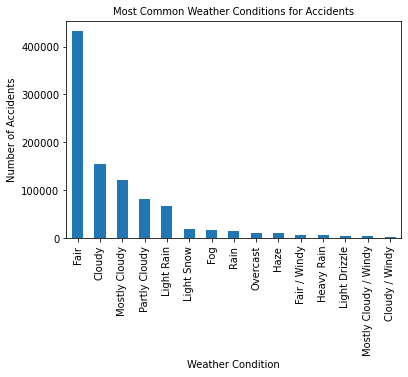

In [12]:
#plotting frequency of accidents by weather condition

cleaned_df['Weather_Condition'].value_counts().head(15).plot.bar()
plt.xlabel('Weather Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Most Common Weather Conditions for Accidents',fontsize=10)

Text(0.5, 1.0, 'Top 30 States with the Highest Number of Accidents')

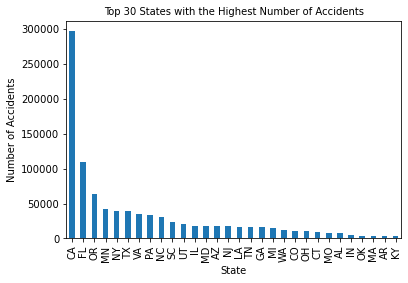

In [13]:
#plotting accidents by state

cleaned_df['State'].value_counts().head(30).plot.bar()
plt.xlabel('State',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Top 30 States with the Highest Number of Accidents',fontsize=10)

Text(0.5, 1.0, 'Top 25 Cities with the Highest Number of Accidents')

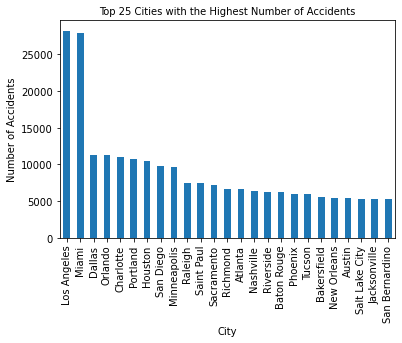

In [14]:
#plotting by citites

cleaned_df['City'].value_counts().head(25).plot.bar()
plt.xlabel('City',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Top 25 Cities with the Highest Number of Accidents',fontsize=10)

Text(0.5, 1.0, 'Severity of Accidents in USA')

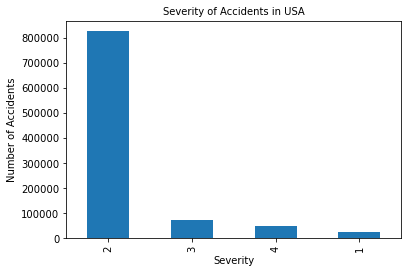

In [15]:
#plotting accidents by severity

cleaned_df['Severity'].value_counts().head(15).plot.bar()
plt.xlabel('Severity',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Severity of Accidents in USA',fontsize=10)

In [17]:
#checking if there is a difference in our variables based on severity
#we can see that more severe accidents generally have higher average precipitation

cleaned_df.groupby('Severity').mean()

,Temperature(F),Visibility(mi),Pressure(in),Humidity(%),Wind_Speed(mph),Precipitation(in)
Severity,,,,,,
1,70.637236,9.510757,29.066327,51.266092,8.352702,0.005414
2,58.011850,8.940664,29.395161,66.365307,6.973291,0.006846
3,62.818846,8.948384,29.093449,65.621855,8.940266,0.015873
4,58.647904,8.697900,29.292672,69.427138,7.802595,0.009749


In [18]:
#checking the most severe weather conditions
#some of the 

cleaned_df.groupby('Weather_Condition').Severity.mean().sort_values(ascending=False)



Weather_Condition
Freezing Rain / Windy           4.000000
Light Blowing Snow              4.000000
Patches of Fog / Windy          3.600000
Smoke / Windy                   3.106383
Light Snow Shower               3.000000
                                  ...   
Light Sleet / Windy             2.000000
Snow and Sleet / Windy          2.000000
Snow and Sleet                  2.000000
Thunder / Wintry Mix / Windy    2.000000
Thunder and Hail                1.000000
Name: Severity, Length: 102, dtype: float64

Text(0.5, 0, 'Severity')

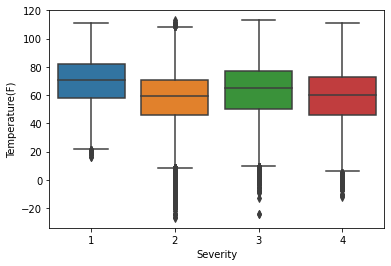

In [19]:
#making box plots with various variables

sns.boxplot(x="Severity", y="Temperature(F)",data=cleaned_df)
plt.ylabel('Temperature(F)')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

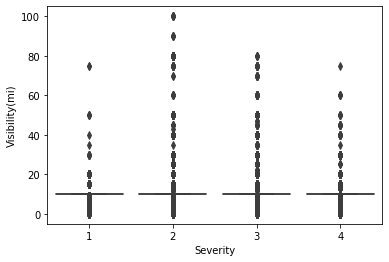

In [20]:
sns.boxplot(x="Severity", y="Visibility(mi)",data=cleaned_df)
plt.ylabel('Visibility(mi)')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

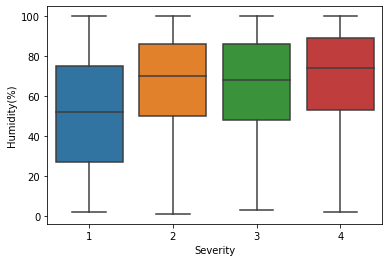

In [20]:
sns.boxplot(x="Severity", y="Humidity(%)",data=cleaned_df)
plt.ylabel('Humidity(%)')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

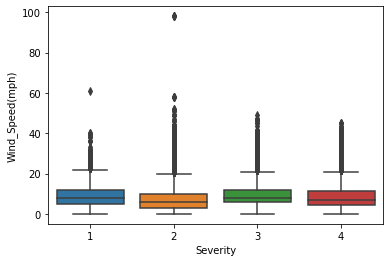

In [21]:
sns.boxplot(x="Severity", y="Wind_Speed(mph)",data=cleaned_df)
plt.ylabel('Wind_Speed(mph)')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

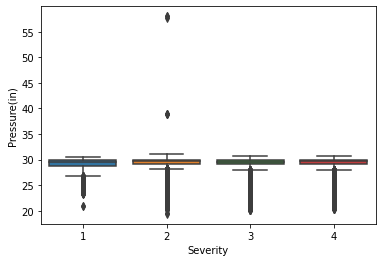

In [22]:
sns.boxplot(x="Severity", y="Pressure(in)",data=cleaned_df)
plt.ylabel('Pressure(in)')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

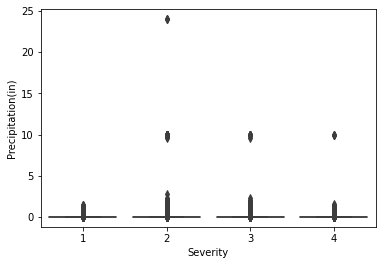

In [22]:
sns.boxplot(x="Severity", y="Precipitation(in)",data=cleaned_df)
plt.ylabel('Precipitation(in)')
plt.xlabel('Severity')

In [23]:
#renaming columns to remove the parentheses, as they werent working for the regression

cleaned_df = cleaned_df.rename(columns={"Temperature(F)": "Temperature", "Visibility(mi)": "Visibility", 
                                        "Pressure(in)" : "Pressure", "Humidity(%)" : "Humidity", 
                                        "Wind_Speed(mph)" : "Wind_Speed", "Precipitation(in)" : "Precipitation"})

cleaned_df.head()

,Severity,Start_Time,State,City,Temperature,Visibility,Weather_Condition,Pressure,Humidity,Wind_Speed,Precipitation,Severity_Text
0,3,2016-02-08 00:37:08,OH,Dublin,42.1,10.0,Light Rain,29.76,58.0,10.4,0.00,High Delay
5,3,2016-02-08 07:53:43,OH,Cincinnati,37.0,10.0,Light Rain,29.69,93.0,10.4,0.01,High Delay
9,2,2016-02-08 11:51:46,OH,Cleveland,33.1,0.5,Snow,29.63,92.0,3.5,0.08,Medium Delay
11,2,2016-02-08 15:16:43,OH,Westerville,32.0,0.5,Snow,29.59,100.0,3.5,0.05,Medium Delay
12,2,2016-02-08 15:43:50,OH,Cincinnati,33.8,3.0,Light Snow,29.66,100.0,4.6,0.03,Medium Delay


In [27]:
#creating correlation matrix

corr = cleaned_df.corr()
corr

,Severity,Temperature,Visibility,Pressure,Humidity,Wind_Speed,Precipitation
Severity,1.000000,-0.000979,-0.026727,-0.031949,0.055842,0.055165,0.016918
Temperature,-0.000979,1.000000,0.224148,0.122691,-0.398403,0.092189,0.001187
Visibility,-0.026727,0.224148,1.000000,-0.042073,-0.376644,0.004158,-0.104870
Pressure,-0.031949,0.122691,-0.042073,1.000000,0.193515,-0.060210,0.017479
Humidity,0.055842,-0.398403,-0.376644,0.193515,1.000000,-0.145220,0.073880
Wind_Speed,0.055165,0.092189,0.004158,-0.060210,-0.145220,1.000000,0.030225
Precipitation,0.016918,0.001187,-0.104870,0.017479,0.073880,0.030225,1.000000


In [26]:
#creating linear regression

result = sm.ols(formula="Severity ~ Temperature + Visibility + Pressure + Humidity + Wind_Speed + Precipitation", data=cleaned_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1640.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:55:15   Log-Likelihood:            -7.6210e+05
No. Observations:              976566   AIC:                         1.524e+06
Df Residuals:                  976559   BIC:                         1.524e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6044      0.014    184.180      0.000       2.577       2.632
Temperature       0.0010    3.4e-05     30.472      0.000       0.001       0.001
Visibility       -0.0007      0.000     -3.107      0.002      -0.001      -0.000
Pressure         -0.0232      0.000    -46.941      0.000      -0.024      -0.022
Humidity          0.0020   2.75e-05     71.170      0.000       0.002       0.002
Wind_Speed        0.0058   9.72e-05     59.947      0.000       0.006       0.006
Precipitation     0.0486      0.005      9.041      0.000       0.038       0.059
==============================================================================
Omnibus:                   424371.737   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1975140.475
Skew:                           2.134   Prob(JB):                         0.00
Kurtosis:                       8.507   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""